## musicntwrk

 A python library for pitch class set and rhythmic sequences classification and manipulation,
 the generation of networks in generalized musical spaces, and the sonification of arbitrary data
 See documentation at www.musicntwrk.com 

 Copyright (C) 2018,2019,2020 Marco Buongiorno Nardelli
 http://www.materialssoundmusic.com, mbn@unt.edu

 This file is distributed under the terms of the
 GNU General Public License. See the file `License'
 in the root directory of the present distribution,
 or http://www.gnu.org/copyleft/gpl.txt .

The network files in csv format can be directly imported in visualization programs like Gephi (www.gephi.org)

Results can be compared with reference files in /REFERENCE

#### the following modules should be present in the python distribution (via pip install or equivalent):
mpi4py - needs an active mpi environment (openmpi or equivalent - it might also require mpich) <br>
music21<br>
pyo<br>
wxPytho<br>
librosa<br>
vpython<br>
python-louvain<br>
pandas<br>
scikit-learn<br>
networkx<br>
tensorflow<br>
pyliblo - needs the installation of the liblo library<br>
bs4<br>
wget<br>

Import modules - pcsPy, rhythmPy, sonifiPy and timbrePy need the correct path

In [1]:
# import warnings
# warnings.filterwarnings("ignore", message="numpy.dtype size changed")
# warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import re, sys, os

# sys.path.append('/Users/marco/Dropbox (Personal)/Musica/Applications/musicntwrk')
from musicntwrk.pcsPy import *
from musicntwrk.rhythmPy import *
from musicntwrk.sonifiPy import *
from musicntwrk.timbrePy import*

<IPython.core.display.Javascript object>

Generation and classification of the full dictionary of pcs of cardinality 2 to 12 in 12TET

In [2]:
full =  None
z = None
temp = []
for i in range(2,13):
    full,z = pcsDictionary(i,TET=12)
    temp.append(full)
full = pd.concat(temp,axis=0)
full.to_csv('12TET_dictionary.csv',index=False)

Generation of the network based on the interval vector distances between 1 and 3

In [3]:
# in output it writes: nodes.csv, edges.csv
dnodes, dedges = pcsNetwork('12TET_dictionary.csv',thup=3.1,thdw=1.1)

Generation of the ego network based on the interval vector distance from node _7-34_ (major scale)

In [4]:
# in output it writes: nodes_ego.csv, edges_ego.csv, edges_alters.csv
pcsEgoNetwork('7-34','12TET_dictionary.csv',thup_e=3.0,thdw_e=0.1,thup=1.5,thdw=0.1)

generation of voice leading network for the panchromatic triadic space based on the interval vector distance for __O__(1)<br>

In [5]:
full,z = pcsDictionary(3,TET=12,order=1)
full.to_csv('triads.csv',index=False)
dnodes,dedges = vLeadNetwork('triads.csv',thup=1.5,thdw=0.1)
dnodes.to_csv('vLead_nodes.csv',index=False)
dedges.to_csv('vLead_edges.csv',index=False)

Anaysis of J.S. Bach chorale from BWV66<br>
musicxml file from music21 corpus

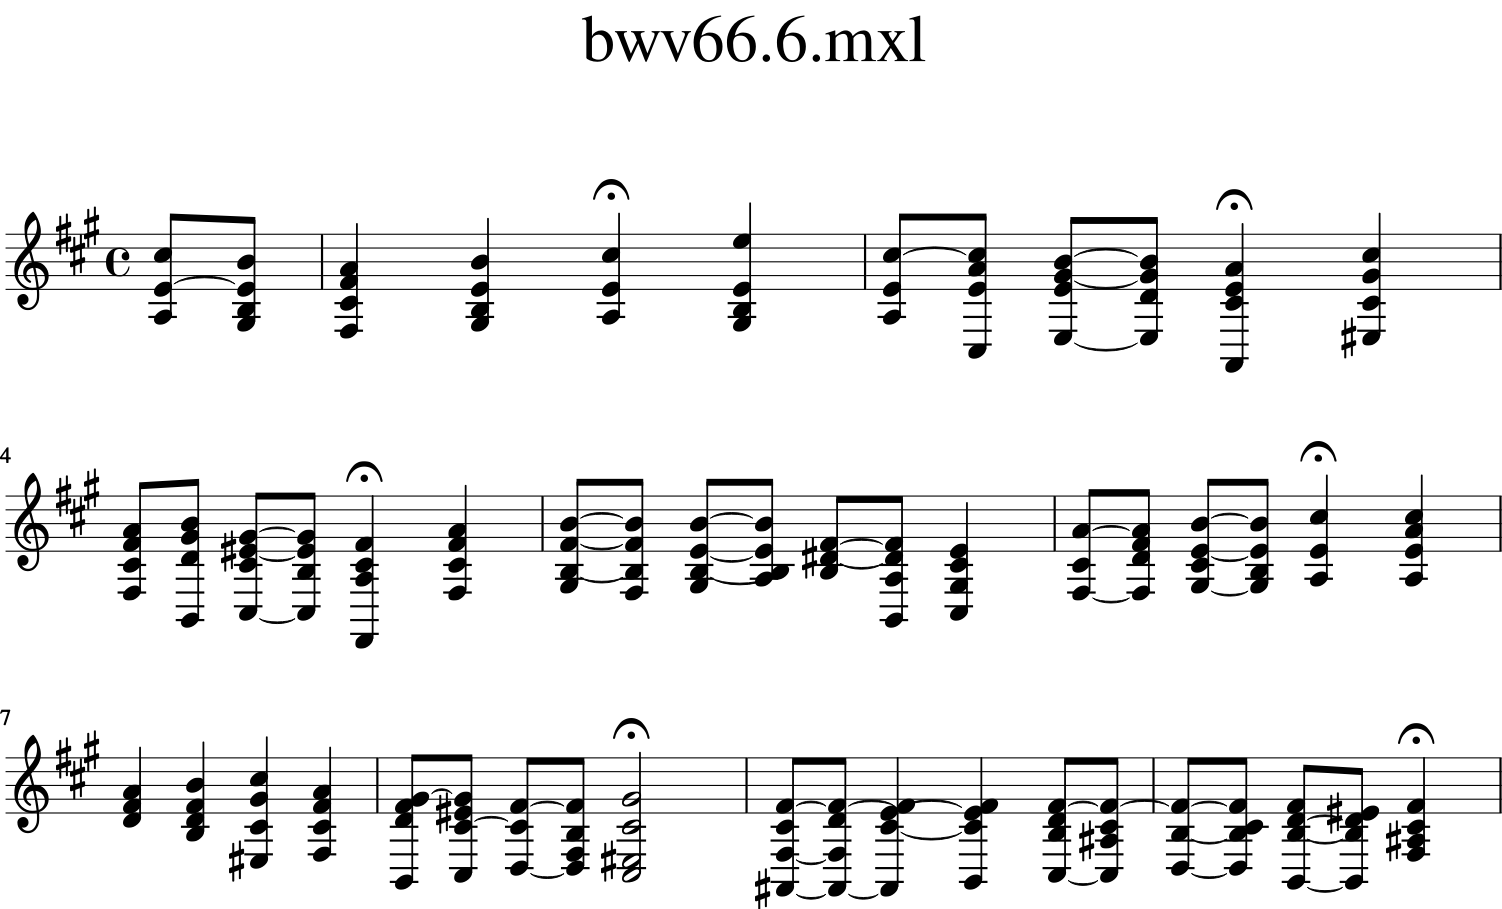

In [16]:
bachChorale = m21.corpus.parse('bwv66.6').corpusFilepath

seq,chords = readScore(bachChorale,music21=True,show=True)

# build dictionary
dictionary = scoreDictionary(seq)
dictionary.to_csv('bachChorale.csv',index=False)

# build network
dnodes,dedges,dcounts,deg,modul = scoreNetwork(seq)
dnodes.to_csv('JSB_nodes.csv',index=False)
dedges.to_csv('JSB_edges.csv',index=False)

Generation and classification of the rhythmic cells  of cardinality 3 in a given sequence

In [17]:
dictionary,_ = rhythmDictionary(3,a=['q','q','e','e','ed','s'],REF='s')
dictionary.to_csv('rhythm.csv',index=False)

Generation of the network based on the duration interval vector

In [18]:
nodes,edges = rhythmNetwork('rhythm.csv',thup=50,thdw=0.1)

Generation of voice leading network for the cells of cardinality 3 of the rhythmic sequence above

In [19]:
rnodes,redges = rLeadNetwork('rhythm.csv',thup=50,thdw=0.1)
rnodes.to_csv('rLead_nodes.csv',index=False)
redges.to_csv('rLead_edges.csv',index=False)

Spectral sonification of data using a FIR filter (requires data file and an installation of pyo on the system)

In [21]:
path = './'
infile = 'ZnO.dat'
xv, y = r_1Ddata(path,infile)
plotCurveXY(xv,y[0,:])
s,a = i_spectral_pyo(xv,y[0])
s.start()
time.sleep(5)
s.stop()
s.shutdown()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Sonification of data from file in csv format (requires data file)

<IPython.core.display.Javascript object>

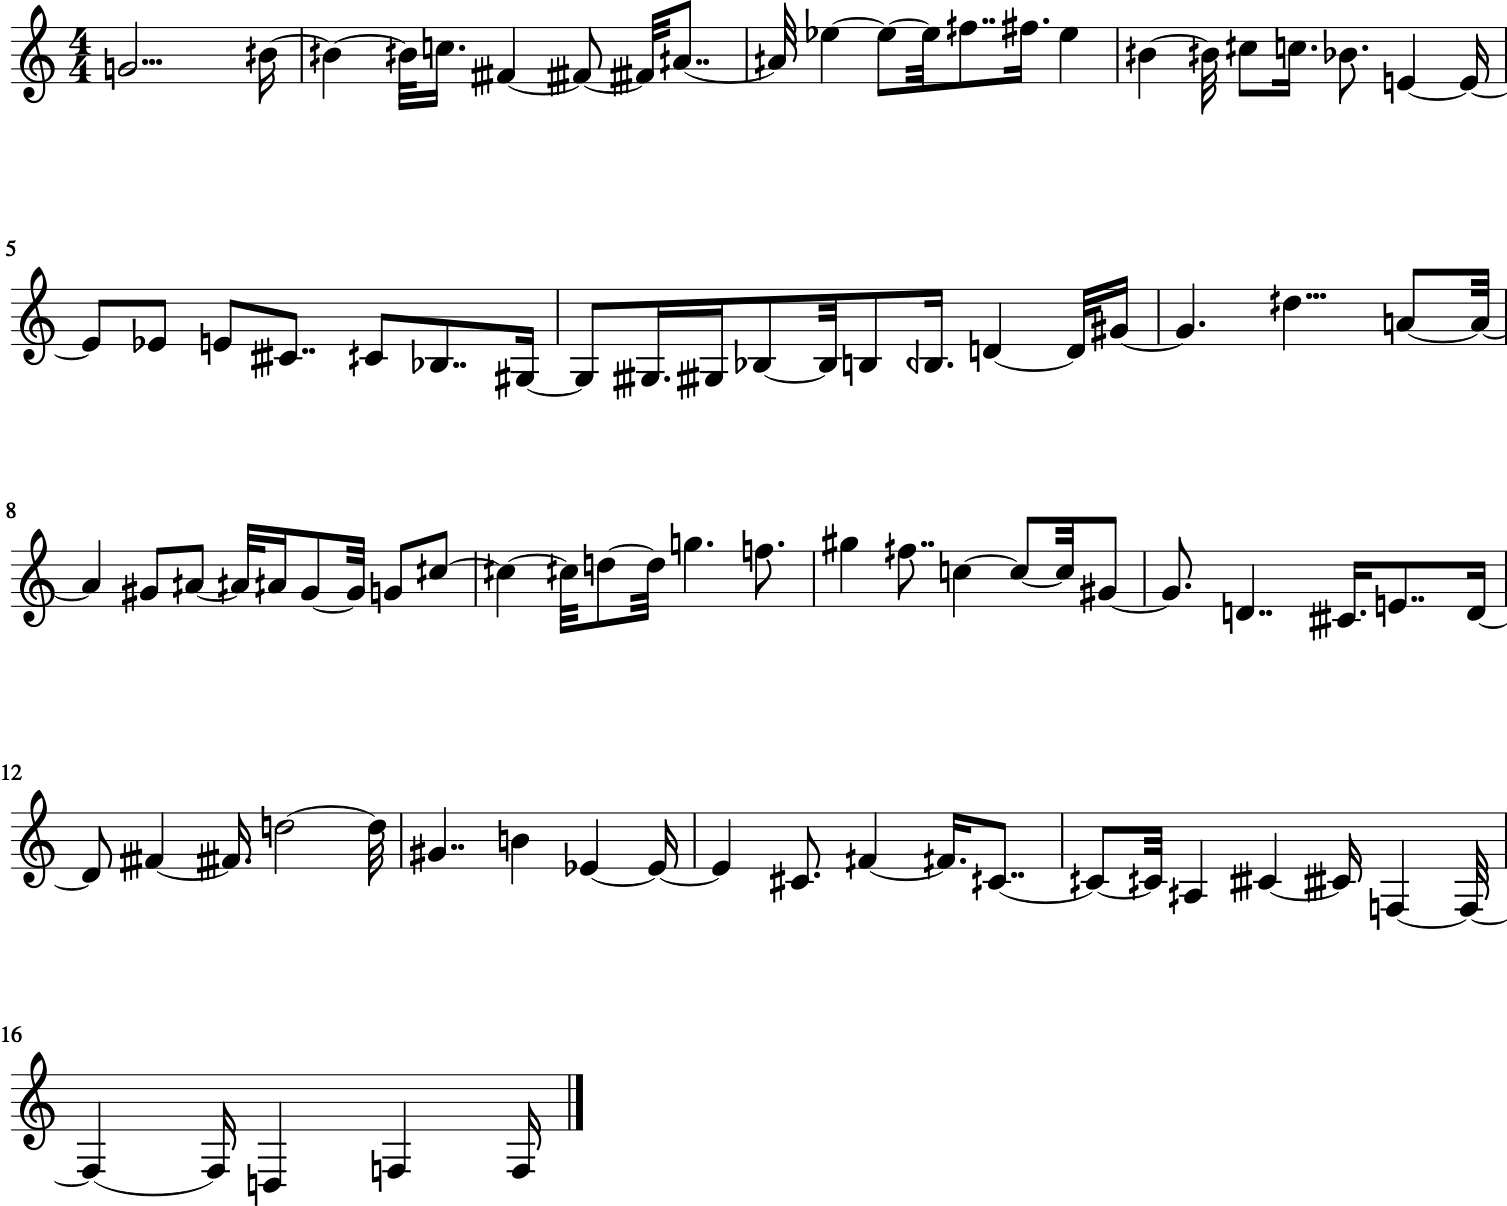

In [22]:
data = pd.read_csv("flux treeline Dolomites 2000.csv")
pdt = np.asarray(data)[4170:4230,2]
plotCurveY(pdt)
scale, nnote = scaleMapping('interval',ini=62,fin=92)
MIDIscore(MIDImap(pdt,scale,nnote)-12,dur=4,w=None)
MIDImidi(MIDImap(pdt,scale,nnote)-12,dur=8,vnorm=80)

Example of orchestration analysis - JS Bach 2nd Brandenburg Concerto, BWV 1047, Allegro

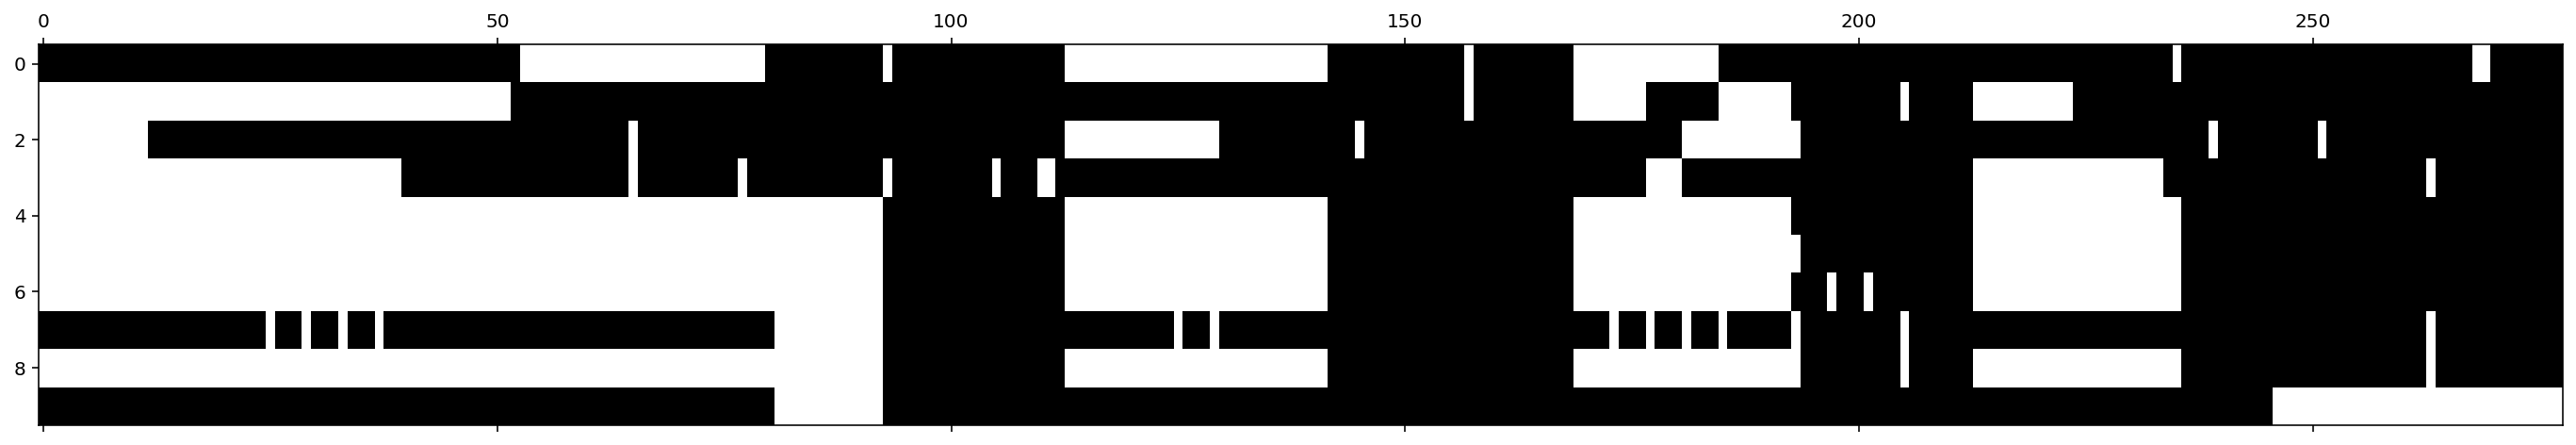

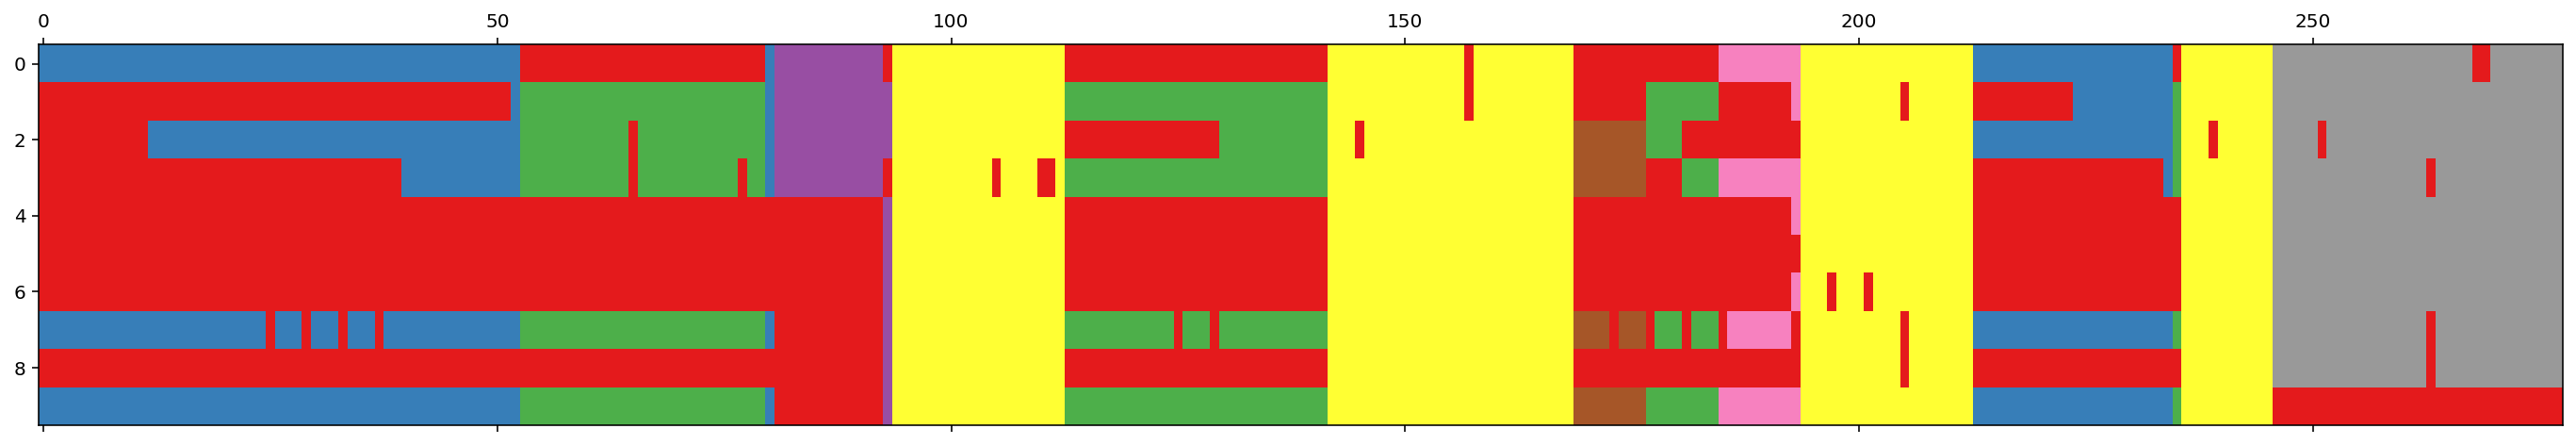

In [23]:
score,orch,num = orchestralVector('BWV1047-Allegro.mxl')
dnodes,dedges,avgdeg,modul,part = orchestralNetwork(orch)
orchestralVectorColor(orch,dnodes,part,color=plt.cm.Set1)